In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data=pd.read_csv('spotify.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
title        603 non-null object
artist       603 non-null object
top genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [3]:
data[['top genre']] = data[['top genre']].apply(LabelEncoder().fit_transform)
data[['artist']] = data[['artist']].apply(LabelEncoder().fit_transform)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
title        603 non-null object
artist       603 non-null int32
top genre    603 non-null int32
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int32(2), int64(11), object(1)
memory usage: 61.4+ KB


,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",174,46,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,49,27,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,89,25,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,94,25,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,19,48,2010,109,84,64,-5,9,43,221,2,4,78


In [102]:
X=data.iloc[:,1:]
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

In [103]:
pca =PCA(n_components=2) 
X_principal = pca.fit_transform(X_scaled) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']   
X=X_principal
X.head()

,P1,P2
0,-1.655150,-0.978943
1,-1.712076,1.483594
2,-2.087764,0.167172
3,-1.713388,0.814617
4,-1.105628,-0.141099


In [30]:
km=KMeans(n_clusters=2)
km.fit(X)
km.predict(X)
data['km pred']=KMeans(n_clusters=2).fit_predict(X)
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,km pred,ms pred,db pred,ac pred
0,"Hey, Soul Sister",174,46,2010,97,89,67,-4,8,80,217,19,4,83,1,0,0,0
1,Love The Way You Lie,49,27,2010,87,93,75,-5,52,64,263,24,23,82,1,0,0,0
2,TiK ToK,89,25,2010,120,84,76,-3,29,71,200,10,14,80,1,0,0,0
3,Bad Romance,94,25,2010,119,92,70,-4,8,71,295,0,4,79,1,0,0,0
4,Just the Way You Are,19,48,2010,109,84,64,-5,9,43,221,2,4,78,1,0,0,0


In [31]:
data['km pred']=KMeans(n_clusters=2).fit_predict(X)
data['ms pred']=MeanShift(bandwidth=1).fit_predict(X)
data['db pred']=DBSCAN(eps=1).fit_predict(X)
data['ac pred']=AgglomerativeClustering(n_clusters=2).fit_predict(X)
data.sample(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,km pred,ms pred,db pred,ac pred
555,Wait,114,48,2018,126,60,66,-5,11,45,191,10,6,67,0,0,0,0
452,Stay,181,23,2017,102,62,69,-5,12,54,210,25,6,80,0,0,0,0
533,My My My!,175,25,2018,103,46,70,-8,5,48,205,0,8,76,1,1,1,1
411,Don't Be A Fool,157,18,2016,175,34,47,-6,10,27,216,60,4,65,1,2,1,1
35,Sexy Bitch (feat. Akon),41,25,2010,130,63,81,-5,13,80,196,8,5,61,0,0,0,0
542,Chun-Li,132,25,2018,129,73,69,-5,11,48,192,28,37,73,0,0,0,0
289,Blame,22,25,2015,128,86,41,-4,34,35,213,3,8,76,0,0,0,0
9,Only Girl (In The World),145,8,2010,126,72,79,-4,7,61,235,13,4,73,0,0,0,0
101,Last Friday Night (T.G.I.F.),86,25,2011,126,81,65,-4,67,72,231,0,4,27,0,5,0,0
491,Body Moves,37,25,2017,102,69,65,-5,4,86,236,0,4,62,0,0,0,0


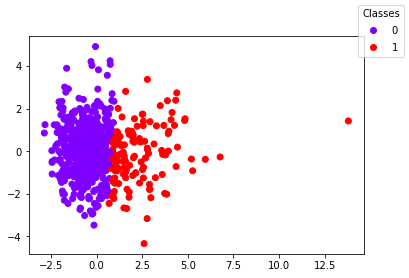

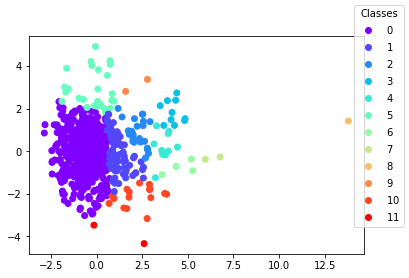

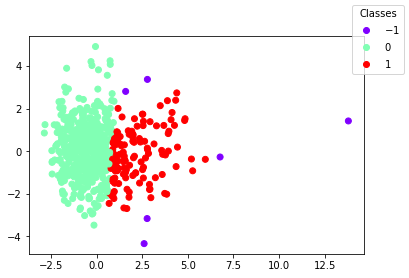

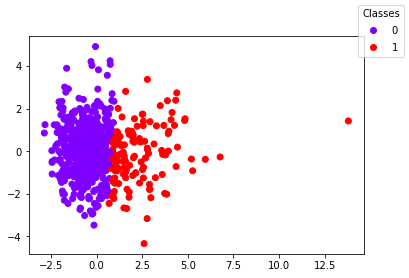

In [32]:
for i in range(-4,0):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X['P1'], X['P2'], c= data.iloc[:,i], cmap ='rainbow')
    legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")


In [26]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,km pred,ms pred,db pred,ac pred
0,"Hey, Soul Sister",174,46,2010,97,89,67,-4,8,80,217,19,4,83,0,0,0,0
1,Love The Way You Lie,49,27,2010,87,93,75,-5,52,64,263,24,23,82,0,0,0,0
2,TiK ToK,89,25,2010,120,84,76,-3,29,71,200,10,14,80,0,0,0,0
3,Bad Romance,94,25,2010,119,92,70,-4,8,71,295,0,4,79,0,0,0,0
4,Just the Way You Are,19,48,2010,109,84,64,-5,9,43,221,2,4,78,0,0,0,0


In [27]:
print(silhouette_score(X, data['km pred']), davies_bouldin_score(X, data['km pred']))
print(silhouette_score(X, data['ms pred']), davies_bouldin_score(X, data['ms pred']))
print(silhouette_score(X, data['db pred']), davies_bouldin_score(X, data['db pred']))
print(silhouette_score(X, data['ac pred']), davies_bouldin_score(X, data['ac pred']))


0.4468999171900162 0.9777657370130636
0.2515721298322866 0.8865473936508672
0.42910096864814345 1.7850197250419975
0.4468999171900162 0.9777657370130636


In [122]:
indexlist=[]
indexlistrec=[]
mylist=['Antisocial (with Travis Scott)','Too Good', 'First Time','Thrift Shop (feat. Wanz)', 'Summer', 'Treat You Better', 'Rockabye (feat. Sean Paul & Anne-Marie)']
for index, val in enumerate(data['title']):
    if val in mylist:
        print(val)
        indexlist.append(index)
indexlist  
spotifyrecommendations=['Waiting For Love', 'Burn', 'Uptown Funk', 'Something Just Like This', 'What Do You Mean?', 'Jimmy lovine (feat. Ab-Soul)']
for index, val in enumerate(data['title']):
    if val in spotifyrecommendations:
        print(val)
        indexlistrec.append(index)

Thrift Shop (feat. Wanz)
Summer
Too Good
Treat You Better
Rockabye (feat. Sean Paul & Anne-Marie)
First Time
First Time
Antisocial (with Travis Scott)
Burn
Uptown Funk
What Do You Mean?
Something Just Like This


In [184]:
myspotify=data.iloc[indexlist,-4]
rec=data.iloc[indexlistrec,-4]
rec

228    1
272    0
279    0
455    0
Name: km pred, dtype: int32

In [16]:
for i in range(2,10):
    data['km pred']=KMeans(n_clusters=i).fit_predict(X)
    print(silhouette_score(X, data['km pred']), davies_bouldin_score(X, data['km pred']))

0.4468999171900162 0.9777657370130636
0.342964873310637 0.9560368868242959
0.339173540930985 0.9629263997468869
0.3334574323963401 0.9595984126441823
0.328402088468009 0.890388170657406
0.3423507246510837 0.7699888603031525
0.3346564588822493 0.7798866539400906
0.3437067505076565 0.809969941937048


In [17]:
for i in range(2,10):
    data['ac pred']=AgglomerativeClustering(n_clusters=i).fit_predict(X)
    print(silhouette_score(X, data['ac pred']), davies_bouldin_score(X, data['ac pred']))

0.4468999171900162 0.9777657370130636
0.31587572487144244 0.9276248973377618
0.3231257610462751 0.9304312182621317
0.2952014700486828 1.0454009482955748
0.2650462335882397 0.9624630578010539
0.2881640559681916 0.9330151053950108
0.2911596679798074 0.8292835069596549
0.30242870765338004 0.7938188871642287


In [18]:
import numpy as np
array=np.arange(0.5,1.2,0.1)
for i in array:
    data['ms pred']=MeanShift(bandwidth=i).fit_predict(X)
    print(silhouette_score(X, data['ms pred']), davies_bouldin_score(X, data['ms pred']))

0.2982186957714166 0.6069859350602598
0.291236320743199 0.6649714074172601
0.2702165861949406 0.7042147294259575
0.1927964665390437 0.6706887329790221
0.19765952216640972 0.9501968128314938
0.2515721298322866 0.8865473936508672
0.26502127329200326 0.8163484714779432


In [19]:
array=np.arange(0.5,1.2,0.1)
for i in array:
    data['db pred']=DBSCAN(eps=i).fit_predict(X)
    print(silhouette_score(X, data['db pred']), davies_bouldin_score(X, data['db pred']))

0.31512464584824285 2.5568777486863343
0.34851867715557283 2.5749228673318694
0.3442522708351048 2.3881404727767257
0.3863592437625249 1.7233395164996308
0.41940845051561365 1.675920959363432
0.42910096864814345 1.7850197250419975
0.6669658314551244 0.9710523523541268
